In [84]:
#import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# FEP Students by Grade & Language
df=pd.read_csv("fileselsch.csv", sep='\t')
df

,CDS,COUNTY,DISTRICT,SCHOOL,LC,LANGUAGE,KDGN,GR_1,GR_2,GR_3,...,GR_5,GR_6,GR_7,GR_8,GR_9,GR_10,GR_11,GR_12,UNGR,"TOTAL_EL,,,,,"
0,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,01,Spanish,0,0,0,0,...,0,2,1,1,6,9,12,9,0,"40,,,,,"
1,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,11,Arabic,0,0,0,0,...,0,3,2,0,3,2,4,0,0,"14,,,,,"
2,1100170123968,Alameda,Alameda County Office of Education,Community School for Creative Education,01,Spanish,6,8,10,8,...,15,7,9,2,0,0,0,0,0,"74,,,,,"
3,1100170123968,Alameda,Alameda County Office of Education,Community School for Creative Education,99,Other non-English languages,0,0,0,0,...,1,1,1,1,0,0,0,0,0,"4,,,,,"
4,1100170123968,Alameda,Alameda County Office of Education,Community School for Creative Education,34,Tongan,0,0,0,0,...,0,1,0,0,0,0,0,0,0,"1,,,,,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60890,58727695838305,Yuba,Wheatland Union High,Wheatland Union High,01,Spanish,0,0,0,0,...,0,0,0,0,7,8,7,5,0,"27,,,,,"
60891,58727695838305,Yuba,Wheatland Union High,Wheatland Union High,08,Japanese,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"1,,,,,"
60892,58727695838305,Yuba,Wheatland Union High,Wheatland Union High,23,Hmong,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"1,,,,,"
60893,58727695838305,Yuba,Wheatland Union High,Wheatland Union High,28,Punjabi,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"1,,,,,"


In [92]:
unique_languages = df['LANGUAGE'].unique()
count_unique_languages = len(unique_languages)
sum_unique_languages = unique_languages.sum()

print(f"Number of unique Languages: {count_unique_languages}")
print(f"Sum of unique Reclass: {sum_unique_languages}, ")

Number of unique Languages: 108
Sum of unique Reclass: SpanishArabicOther non-English languagesTonganCantoneseKhmer (Cambodian)VietnameseJapaneseRussianKoreanMandarin (Putonghua)Farsi (Persian)FrenchAmharicPortugueseTigrinyaPashtoPunjabiUrduFinnishTeluguTamilBengaliChaozhou (Chiuchow)Filipino (Pilipino or Tagalog)MongolianLaoSerbo-Croatian (Bosnian, Croatian, Serbian)HebrewToishaneseBurmeseTurkishHindiHmongGreekThaiIlocanoMien (Yao)RumanianMarathiPolishGermanSwedishNepaliCebuano (Visayan)ArmenianIndonesianItalianUkrainianTaiwaneseGujaratiNorwegianBulgarianSamoanAlbanianHungarianIranian LanguagesAssyrianOromoSwahiliKannadaKachin (Jingpho)UzbekMalayalamTwiMayan LanguagesDutchPampanga; KapampanganHaitian (Haitian Creole)SomaliMixtecoYorubaCatalan; ValencianMalayKonkaniMarshalleseChaldeanKurdish (Kurdi, Kurmanji)CzechLahuBerber languagesCreoles and pidgins, English basedSlovakKikuyu (Gikuyu)Afro-Asiatic languagesKhmuDanishSinhala; SinhaleseAfrikaansCentral American Indian LanguagesZapoteco

In [51]:
df.columns
# df.info()

Index(['CDS', 'COUNTY', 'DISTRICT', 'SCHOOL', 'LC', 'LANGUAGE', 'KDGN', 'GR_1',
       'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'GR_9', 'GR_10',
       'GR_11', 'GR_12', 'UNGR', 'TOTAL_EL,,,,,'],
      dtype='object')

In [52]:
df['TOTAL_EL,,,,,'] = df['TOTAL_EL,,,,,'].str.split(',').str[0]

In [97]:
# Converting objects'String Values' into integers
label_encoders = {}
columns_to_encode = ['COUNTY', 'DISTRICT', 'SCHOOL', 'LC', 'LANGUAGE']

for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [98]:
df.describe()

,CDS,COUNTY,DISTRICT,SCHOOL,LC,LANGUAGE,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,GR_9,GR_10,GR_11,GR_12,UNGR
count,6.089500e+04,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.000000,60895.0
mean,2.942283e+13,26.826849,487.479120,4260.514098,20.961705,61.153691,2.137811,1.751819,1.694573,1.733771,1.656228,1.633648,1.405764,1.193201,1.116775,1.080926,1.042105,0.937515,0.885590,0.0
std,1.413704e+13,13.978410,262.942803,2430.667114,25.017377,33.012230,7.955130,6.499046,6.443501,6.611482,6.379284,6.331746,7.045662,7.931401,7.526789,8.682449,8.450694,7.465471,6.529757,0.0
min,1.100170e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.964733e+13,17.000000,261.000000,2181.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.367033e+13,31.000000,493.000000,4234.000000,10.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,3.868479e+13,36.000000,730.000000,6368.000000,30.000000,90.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,5.872770e+13,56.000000,953.000000,8504.000000,107.000000,107.000000,165.000000,168.000000,165.000000,164.000000,154.000000,138.000000,185.000000,223.000000,278.000000,310.000000,398.000000,404.000000,285.000000,0.0


In [54]:
df.corr()

,CDS,COUNTY,DISTRICT,SCHOOL,LC,LANGUAGE,KDGN,GR_1,GR_2,GR_3,...,GR_5,GR_6,GR_7,GR_8,GR_9,GR_10,GR_11,GR_12,UNGR,"TOTAL_EL,,,,,"
CDS,1.000000,0.999866,0.190141,0.022325,-0.005787,0.015542,-0.000453,0.001620,0.004635,0.005822,...,0.008912,0.006773,0.005714,0.003262,-0.000159,-0.000490,0.004385,0.000113,NaN,0.005949
COUNTY,0.999866,1.000000,0.190026,0.021915,-0.004981,0.015553,-0.001003,0.001094,0.004126,0.005312,...,0.008379,0.006358,0.005433,0.002959,-0.000427,-0.000723,0.004187,-0.000035,NaN,0.005301
DISTRICT,0.190141,0.190026,1.000000,0.082124,0.012491,0.014731,-0.008371,-0.006843,-0.003861,-0.006850,...,-0.004534,-0.005141,0.002468,-0.001168,-0.003537,0.000177,0.001352,0.003285,NaN,-0.004917
SCHOOL,0.022325,0.021915,0.082124,1.000000,-0.003928,-0.000293,0.000434,-0.000157,-0.001049,-0.001093,...,-0.000040,-0.001045,0.003304,0.003711,-0.000513,0.000715,0.004168,0.003445,NaN,0.001962
LC,-0.005787,-0.004981,0.012491,-0.003928,1.000000,0.108324,-0.173931,-0.176926,-0.175341,-0.175699,...,-0.178217,-0.139077,-0.105121,-0.104606,-0.087199,-0.085952,-0.088590,-0.094609,NaN,-0.227588
LANGUAGE,0.015542,0.015553,0.014731,-0.000293,0.108324,1.000000,0.172241,0.176318,0.176240,0.176412,...,0.179507,0.141369,0.105576,0.105939,0.088824,0.087679,0.088848,0.094393,NaN,0.228725
KDGN,-0.000453,-0.001003,-0.008371,0.000434,-0.173931,0.172241,1.000000,0.935630,0.913293,0.896281,...,0.843935,0.328666,0.034222,0.031611,-0.026901,-0.027517,-0.029611,-0.031441,NaN,0.707390
GR_1,0.001620,0.001094,-0.006843,-0.000157,-0.176926,0.176318,0.935630,1.000000,0.934033,0.918764,...,0.872774,0.349136,0.038932,0.036056,-0.025743,-0.026733,-0.028583,-0.029799,NaN,0.721946
GR_2,0.004635,0.004126,-0.003861,-0.001049,-0.175341,0.176240,0.913293,0.934033,1.000000,0.944741,...,0.890955,0.359348,0.040628,0.037977,-0.025416,-0.026222,-0.028021,-0.029515,NaN,0.727863
GR_3,0.005822,0.005312,-0.006850,-0.001093,-0.175699,0.176412,0.896281,0.918764,0.944741,1.000000,...,0.907222,0.365099,0.040121,0.037464,-0.025078,-0.026037,-0.027765,-0.029215,NaN,0.728366


In [61]:
subset = df[['COUNTY', 'DISTRICT', 'SCHOOL', 'LC', 'LANGUAGE', 'TOTAL_EL,,,,,']]
correlation_matrix = subset.corr()


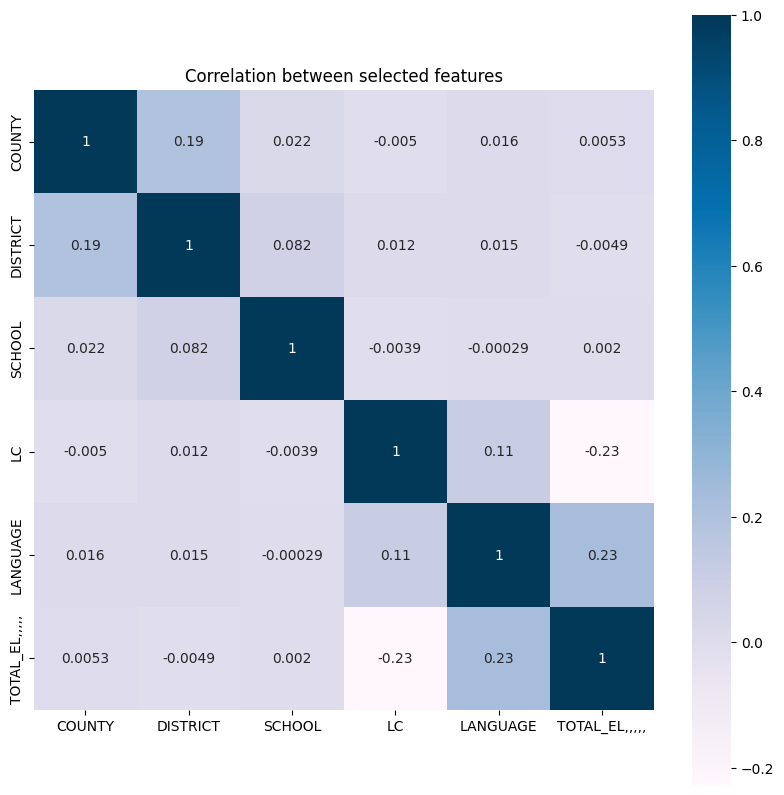

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = df[['COUNTY', 'DISTRICT', 'SCHOOL', 'LC', 'LANGUAGE', 'TOTAL_EL,,,,,']]
correlation_matrix = subset.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True, cmap='PuBu')
plt.title('Correlation between selected features')
plt.show()


In [ ]:

correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='plasma')

plt.title('Correlation between different features')

In [56]:
df.columns

Index(['CDS', 'COUNTY', 'DISTRICT', 'SCHOOL', 'LC', 'LANGUAGE', 'KDGN', 'GR_1',
       'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'GR_9', 'GR_10',
       'GR_11', 'GR_12', 'UNGR', 'TOTAL_EL,,,,,'],
      dtype='object')

In [81]:

x_data = df[['COUNTY', 'DISTRICT', 'SCHOOL', 'LC', 'LANGUAGE',]]
y_data = df['TOTAL_EL,,,,,']

In [58]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X.astype(float))

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# If you want to use StandardScaler:
# scaler = StandardScaler()

# If you want to use MinMaxScaler to scale your data to the [0, 1] range:
scaler = MinMaxScaler()

x_data = scaler.fit_transform(x_data.astype(float))



# X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
x_data[0:5]


array([[0.        , 0.8411215 , 0.        ],
       [0.09345794, 0.03738318, 0.        ],
       [0.        , 0.8411215 , 0.        ],
       [0.8317757 , 0.71962617, 0.        ],
       [0.28971963, 0.92523364, 0.        ]])

In [82]:

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=2000) # 70% training and 30%

In [83]:
#This is model generation

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

#This is to evaluate the model
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.43270020252887403
